### Exercise 2.1

Load the image dog.jpg and convert to grayscale. Use the FFT to compress the images at different compression ratios. Plot the error between the compressed and actual image as a function of the compression ratio.

In [16]:
from matplotlib.image import imread
import numpy as np
import os

A = imread(os.path.join('..','Data','dog.jpg'))
B = np.mean(A, 2); # Convert RGB to grayscale
print(B.shape)

(2000, 1500)


In [17]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

In [34]:
ratio = np.arange(0.001, 0.2, 0.001)
# ratio

In [35]:
CompB = np.zeros((B.shape[0], B.shape[1], len(ratio)))
# CompB[:,:,1]

In [29]:
for r in range(len(ratio)):
    thresh = Btsort[int( np.floor( (1-ratio[r])*len(Btsort) ) )]
    ind = np.abs(Bt) > thresh
    Blow = Bt*ind
    CompB[:,:,r] = np.fft.ifft2(Blow).real

In [32]:
error = np.zeros_like(ratio)

for i in range(len(error)):
    error[i] = np.linalg.norm(np.subtract(B, CompB[:,:,i]))

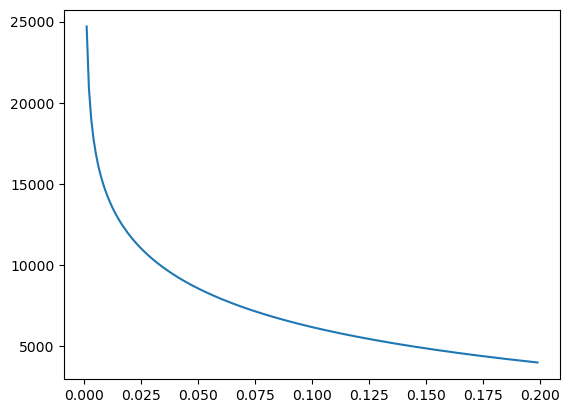

In [33]:
import matplotlib.pyplot as plt
# plt.figure()
# plt.imshow(CompB[:,:,1],cmap='gray')
# plt.axis('off')

plt.plot(ratio, error)
plt.show()

### Exercise 2.2

Consider the following triangular wave:

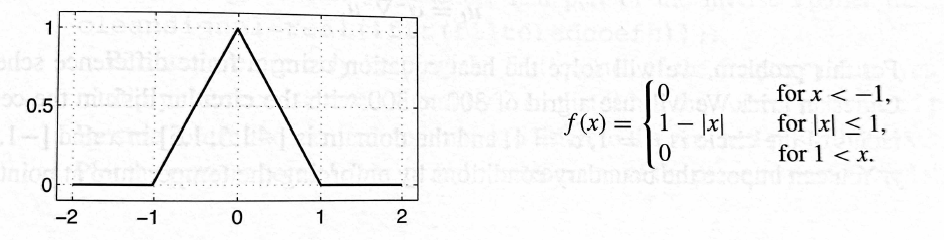

Compute the Fourier series by hand for the domain $-2 \leq x < 2$. 

Plot the mode coefficients $a_n$ and $b_n$ for the first 100 cosine and sine modes (i.e., for the first n = 1 to n = 100). 

Also, plot the approximation using n = 100 modes on top of the true triangle wave.

In a few sentences, explain the difference between the Fourier transform and the Fourier series.




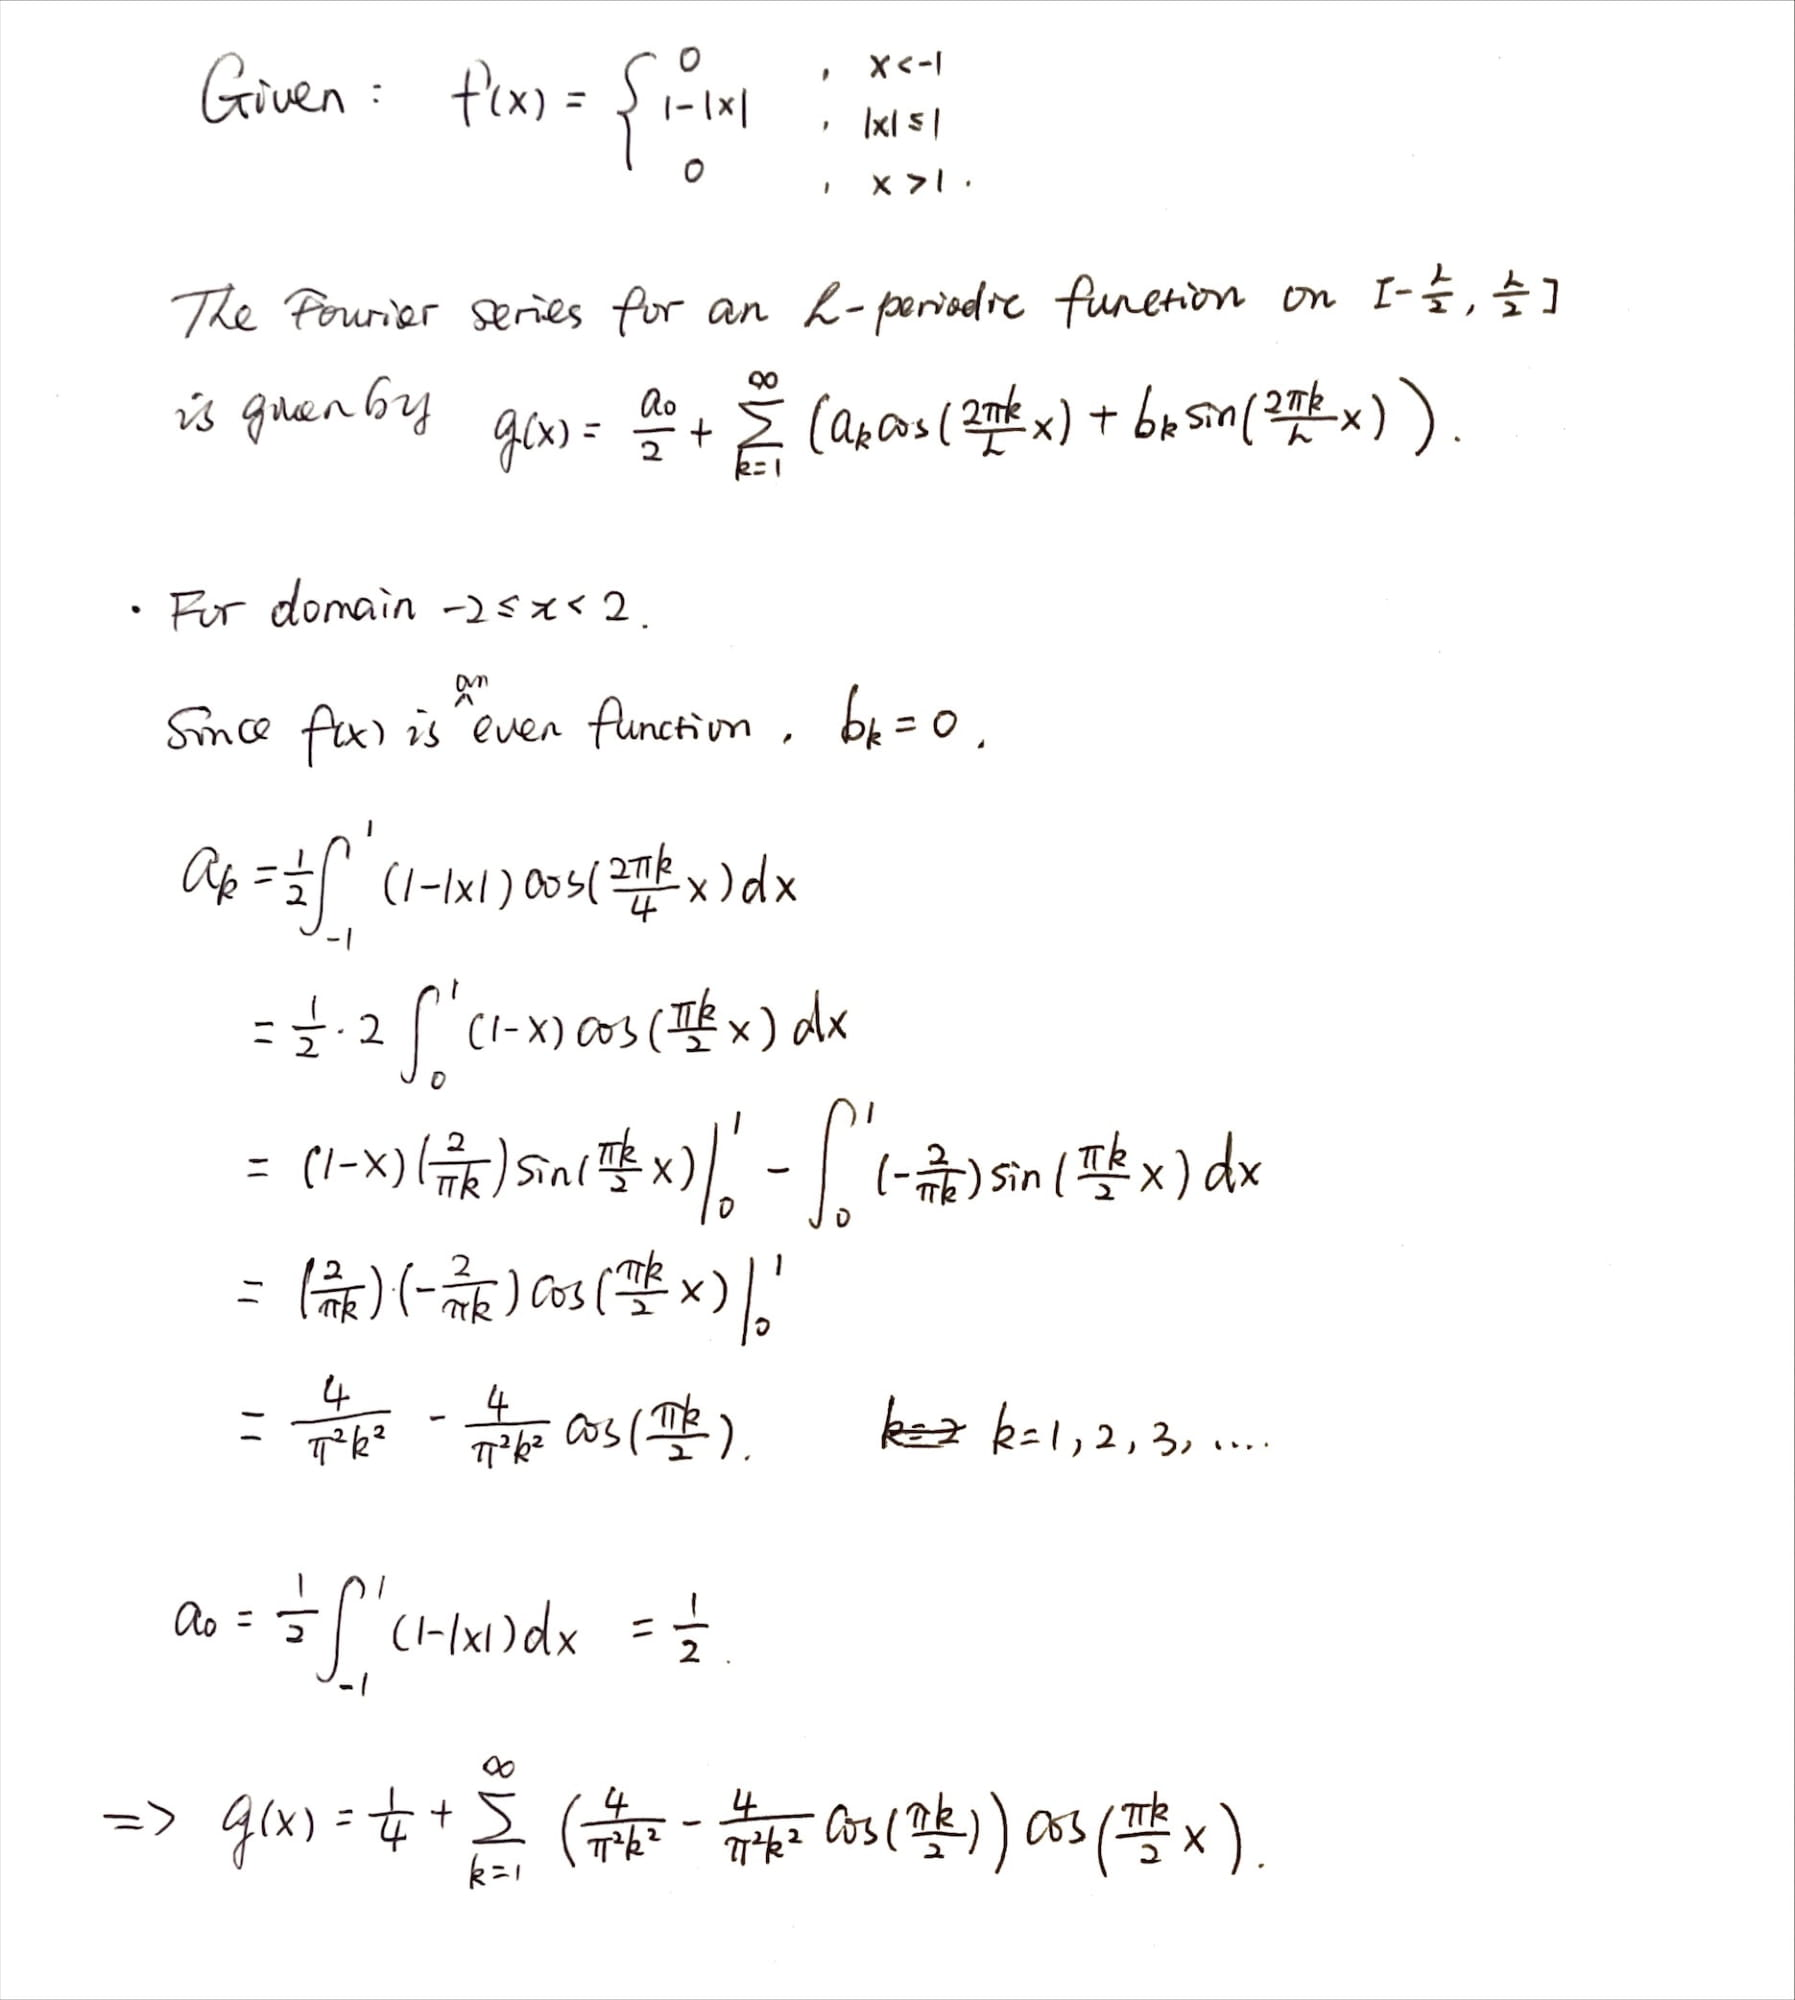

In [40]:
L = 4  # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

n = len(x)
nquart = int(np.floor(n/4))

# Define triangular wave
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

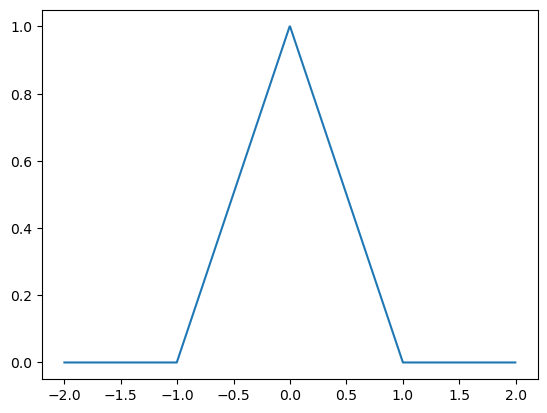

In [41]:
plt.plot(x, f, '-')
plt.show()

In [42]:
A0 = np.sum(f*np.ones_like(x))*dx
fFS = A0/2

A = np.zeros(100)
B = np.zeros(100)

for k in range(20):
    A[k] = np.sum(f*np.cos(2*np.pi*(k+1)*x/L))*dx 
    B[k] = np.sum(f*np.sin(2*np.pi*(k+1)*x/L))*dx


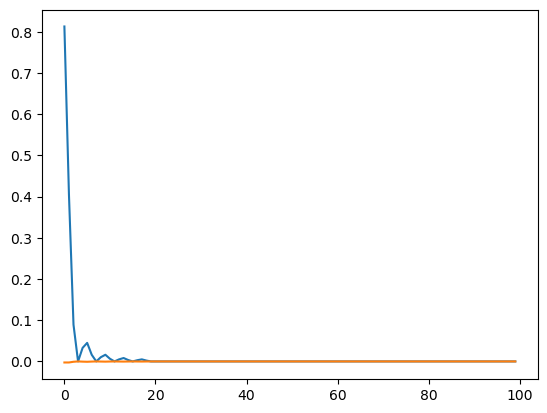

In [44]:
plt.plot(A)
plt.plot(B)
plt.show()